In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [3]:
# Activation function: Sigmoid with clipping to prevent overflow
def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class with 2 hidden layers
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden1 = 2 * np.random.rand(input_size, hidden1_size) - 1
        self.bias_hidden1 = 2 * np.random.rand(hidden1_size) - 1
        self.weights_hidden1_hidden2 = 2 * np.random.rand(hidden1_size, hidden2_size) - 1
        self.bias_hidden2 = 2 * np.random.rand(hidden2_size) - 1
        self.weights_hidden2_output = 2 * np.random.rand(hidden2_size, output_size) - 1
        self.bias_output = 2 * np.random.rand(output_size) - 1

    def forward(self, inputs):
        # Forward propagation
        self.hidden1_input = np.dot(inputs, self.weights_input_hidden1) + self.bias_hidden1
        self.hidden1_output = sigmoid(self.hidden1_input)
        self.hidden2_input = np.dot(self.hidden1_output, self.weights_hidden1_hidden2) + self.bias_hidden2
        self.hidden2_output = sigmoid(self.hidden2_input)
        self.output_layer_input = np.dot(self.hidden2_output, self.weights_hidden2_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, inputs, expected_output, learning_rate):
        # Calculate error
        output_error = expected_output - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden2_error = output_delta.dot(self.weights_hidden2_output.T)
        hidden2_delta = hidden2_error * sigmoid_derivative(self.hidden2_output)

        hidden1_error = hidden2_delta.dot(self.weights_hidden1_hidden2.T)
        hidden1_delta = hidden1_error * sigmoid_derivative(self.hidden1_output)

        # Update weights and biases
        self.weights_hidden2_output += self.hidden2_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * learning_rate
        self.weights_hidden1_hidden2 += self.hidden1_output.T.dot(hidden2_delta) * learning_rate
        self.bias_hidden2 += np.sum(hidden2_delta, axis=0) * learning_rate
        self.weights_input_hidden1 += inputs.T.dot(hidden1_delta) * learning_rate
        self.bias_hidden1 += np.sum(hidden1_delta, axis=0) * learning_rate

        # Return the error for plotting
        return np.sum(output_error**2) / len(inputs)

    def train(self, inputs, expected_output, iterations, learning_rate):
        errors = []
        for i in range(iterations):
            self.forward(inputs)
            error = self.backward(inputs, expected_output, learning_rate)
            errors.append(error)
            # if i==iterations
        print(error)
        return errors
    
    def export_weights_biases(self, file_path):
        with open(file_path, 'w') as f:
            f.write(f"W1:\n{self.weights_input_hidden1}\n\n")
            f.write(f"b1:\n{self.bias_hidden1}\n\n")
            f.write(f"W2:\n{self.weights_hidden1_hidden2}\n\n")
            f.write(f"b2:\n{self.bias_hidden2}\n\n")
            f.write(f"W3:\n{self.weights_hidden2_output}\n\n")
            f.write(f"b3:\n{self.bias_output}\n\n")

In [4]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        data = [line.strip().split() for line in file.readlines()]
    return np.array(data, dtype=float)

In [5]:
inputs = read_data('input.txt')
expected_output = read_data('output.txt')
expected_output = expected_output.reshape(-1, 3)  # Adjust this based on your output size

0.007464357760673687


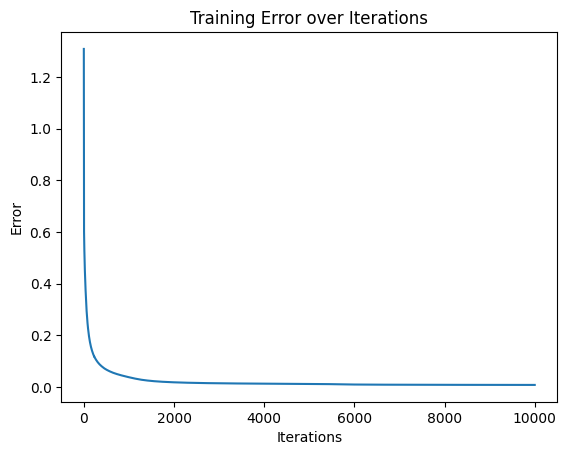

In [11]:
# Example usage
if __name__ == "__main__":

    # Create neural network
    input_size = 784
    hidden1_size = 64
    hidden2_size = 16
    output_size = 3

    iterations = 10000
    learning_rate=1/(len(inputs))

    num_runs = 1
    all_errors = []

    np.set_printoptions(threshold=sys.maxsize)
    np.set_printoptions(precision=4)

    for i in range(num_runs):
        nn = NeuralNetwork(input_size, hidden1_size, hidden2_size, output_size)
        errors = nn.train(inputs, expected_output, iterations, learning_rate)
        all_errors.append(errors)

        nn.export_weights_biases(f"weights_biases_run_{i+1}.txt")

    # Plot the error values on a logarithmic scale on the x-axis
    for i, errors in enumerate(all_errors):
        plt.plot(errors, label=f'Run {i+1}')

    # plt.xscale('log')
    plt.xlabel('Iterations')
    plt.ylabel('Error')
    plt.title('Training Error over Iterations')
    plt.show()

In [9]:
test= read_data('test.txt')

In [10]:
print("Predicted Output:")
res=nn.forward(test)
for i in range(len(res)):
    sum=res[i][0]+res[i][1]+res[i][2]
    print(f"Circle: {(res[i][0]/sum)*100:.2f}%, Square: {(res[i][1]/sum)*100:.2f}%, Triangle: {(res[i][2]/sum)*100:.2f}%")

Predicted Output:
Circle: 90.35%, Square: 6.72%, Triangle: 2.93%
Circle: 70.76%, Square: 26.99%, Triangle: 2.25%
Circle: 18.91%, Square: 29.53%, Triangle: 51.56%
Circle: 1.51%, Square: 4.90%, Triangle: 93.59%
Circle: 0.55%, Square: 73.03%, Triangle: 26.42%
Circle: 0.19%, Square: 62.47%, Triangle: 37.34%
Circle: 0.16%, Square: 35.53%, Triangle: 64.31%
Circle: 0.51%, Square: 66.25%, Triangle: 33.24%
Circle: 0.31%, Square: 40.87%, Triangle: 58.81%
